In [1]:
import pandas as pd 
import scipy.stats as stats
import pylab
import seaborn as sns

ad = pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [3]:
df.isnull().values.any()

False

In [5]:
# gazete ile radyo arasında biraz korelasyon var ama %50'nin çok altında yok diyebiliriz.
# bu durumda şöyle diyebiliriz bağımsız değişkenlerimiz gerçekten birbirlerinden bağımsız (TV, radio, newspaper),
# birbirleriyle korelasyonları yok ve hedef değişkenimizle de korelasyon olduğu söylenebilir. 
# TV-sales %78. radio-sales yaklaşık %60

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


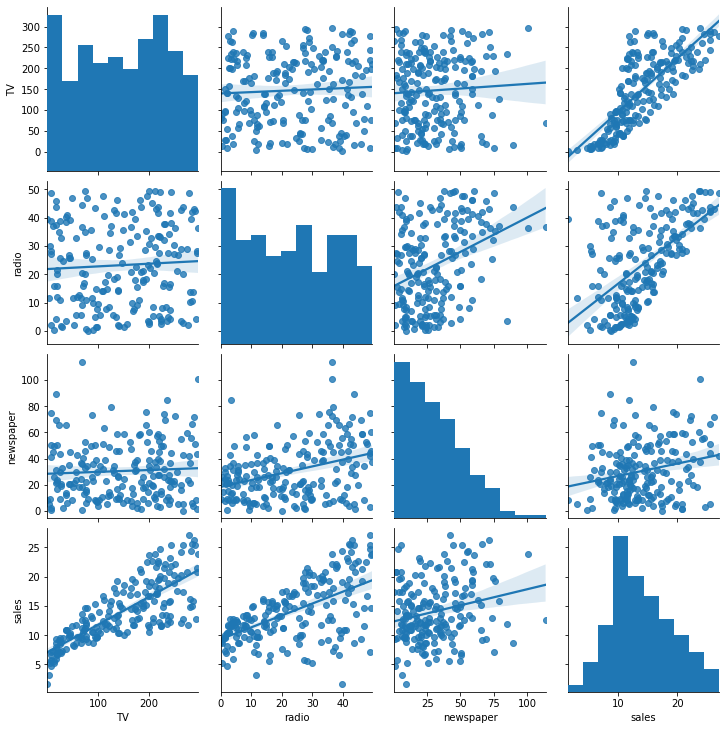

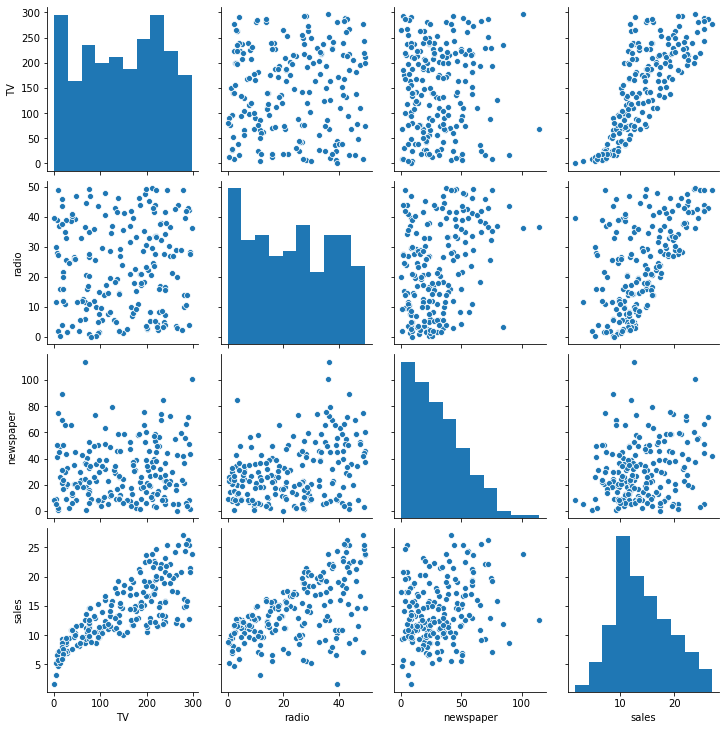

In [8]:
sns.pairplot(df, kind="reg")      # fit linear regression models to the scatter plots:
sns.pairplot(df, kind="scatter")

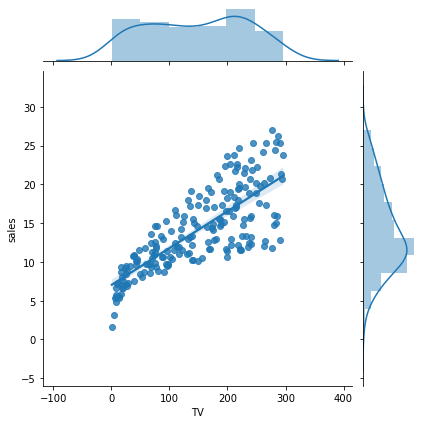

In [7]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

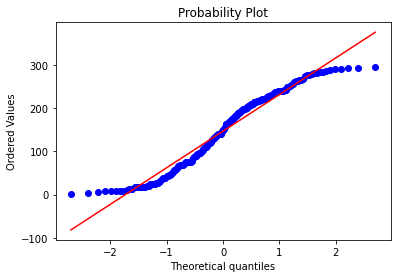

In [10]:
# qqplot sadece normality kontrol ederken probplot bütün mevcut dağılımlarını kontrol eder.

stats.probplot(df["TV"], dist="norm", plot=pylab)   # normal probability plot
pylab.show()

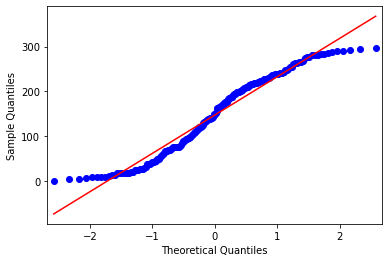

In [10]:
# qqplot sadece normality kontrol eder

import statsmodels.api as sm
sm.qqplot(df["TV"], line="s")
pylab.show()

In [13]:
# eğer burada aşağıdaki formula'da yaptığımız gibi manipulasyon yapmak isteseydik X'e dataframe üzerinden yani constant 
# eklediğimiz gibi yapmamız gerekirdi. yani diyelim tv'nin karesi ile ilişkilendirmek istedik o zaman dataframede kolonun 
# karesini bulup o şekilde eklememiz gerekirdi.

import statsmodels.api as sm
X = df[["TV"]]
#X[0:5]

X = sm.add_constant(X)  
# sabit değer ekledik y sadece x'e bağlı olmasın diye constant ekledik B0 gibi. ilerde böyle yapılmayacak.

y= df["sales"]
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        11:44:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
import statsmodels.formula.api as smf

In [20]:
# bana sales'ı TV ile açıkla
lm = smf.ols("sales ~ TV", df)  
# sales ~ tv**2 + newspaper*10 gibi formuller kullanılabilir. burda anlatılmak istenen tv'nin karesi ile newspaperın 10 katını
# ile sales'ı açıkla. yani değerler üzerinde manipülasyonlar yapılarak sales değişkeni açıklanmaya çalışılır.

In [21]:
# bir öncekinin aynısı verir. aradaki fark burada constant eklemedik. kendiliğinden intercept diye getirdi.
# ols'yi burda formula ile yapıyorsak constant vermemiz beklenmiyor
# formula ile yaparken data üzerinde ~tilde notation ile data üzerinde manipülasyon yapılabilir.

model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        12:09:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# F-statistics --> ilk model kurulurken B1, B2, B3'ün sıfırdan farklı mı diye kurduğumuz ANOVA yaptığımız kısım.

In [22]:
model.params # katsayıları döndürür

Intercept    7.032594
TV           0.047537
dtype: float64

In [25]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [ ]:
# burada bulunan fonksiyon sales = 7.03 + 0.0475*TV

In [26]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [27]:
model.f_pvalue

1.467389700194647e-42

In [29]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)
print("fvalue: ", "%.2f" % model.fvalue)
print("tvalue: ", "%.2f" % model.tvalues[0:1])

f_pvalue:  0.0000
fvalue:  312.14
tvalue:  15.36


In [30]:
model.rsquared_adj

0.6099148238341623

In [35]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
# sales = 7.0326 + 0.0475*TV fonksiyonuna göre fit edilen y değerleri
# fittedvalues[0] = 7.03 + 0,0475*df["TV"][0]     
# df["TV"][0]=230,1
# 17,959 = 7,03 + 0,0475*230,1
# 9,14375 = 7,03 + 0,0475*44,5
# virgüllerden dolayı ufakf farklılıklar oluyor

model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [39]:
# gerçek sales değerleri ile fittedvalues değerleri arasındaki fark errorler olacak
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [40]:
print("Sales= "+ str("%.2f" % model.params[0])+ " + TV" + "*" + str("%.2f" % model.params[1]))

Sales= 7.03 + TV*0.05


Text(0.5, 0, 'TV Harcamaları')

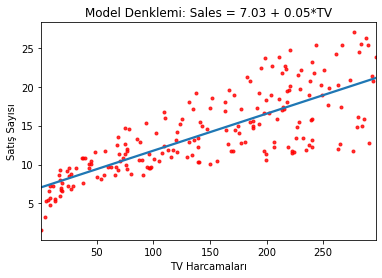

In [41]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + 0.05*TV")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

In [50]:
from sklearn.linear_model import LinearRegression

X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()

In [51]:
model = reg.fit(X, y)

In [56]:
print(model)

LinearRegression()


In [57]:
model.intercept_

7.032593549127693

In [54]:
model.coef_

array([0.04753664])

In [55]:
model.score(X, y)

0.611875050850071

In [58]:
# model.fittedvalues ile aynı değerleri döndürüyor.
# yani aynı tahminler yapılıyor. fonksiyon aynı 

model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [60]:
# 30 reklam TV'de çıkarsa oran 7.03'den 8.45'e çıkıyor diyebiliriz. fonksiyon sabitimiz 7.03 olduğu için hiçbir şey yapmasak
# 7.03 oranında satış yapabiliyoruz demek oluyor yani TV=0 için y = 7.03
# predict 30 olunca y = 7.03 + 0,0475* 30 oluyor --> 8,45 

X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.predict([[30]])

array([8.45869276])

In [63]:
# 5 reklam 90 reklam 200 reklam verirsek alacağımız sonuçları görebiliriz.

yeni_veri = [[5], [90], [200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
#model.summary()
mse = mean_squared_error(y, model.fittedvalues)

In [88]:
# modellemede mean_squared_error küçük olan tercih edilmelidir.
# burada negatif değerli hatalar da mutlak değer içinde alındığı için genel hata tespit edilir.-1'in karesi = 1 gibi.

mse

10.512652915656757

In [89]:
import numpy as np 

rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [90]:
#LinearRegression (scikitlearn)

reg.predict(X)[:10]
y[:10]
k_t = pd.DataFrame({"gercek_y": y[:10], "tahmin_y": reg.predict(X)[:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [77]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [78]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [79]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [81]:
np.mean(k_t["hata_kare"]) # mean squared error

9.290350329638104

In [84]:
# birebir aynı değil çünkü hepsine uygulanmadı ilk 10 tanesine uygulandı. birebir aynı uygulama yapılsa 
# aynı sonucu verecekti.
mse  # mean squared error

10.512652915656757

In [91]:
# hataları bu şekilde de görebiliyoruz.

model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

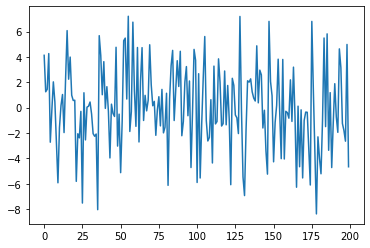

In [94]:
# gözlemelere göre hataların ne kadar olduğunu görebiliyoruz. point by point.
# errorlerin varyanslarını görebiliyoruz -8 ile 8 arasında grafikte. sabit bir varyansı var diyebiliyoruz.

import matplotlib.pyplot as plt 

plt.plot(model.resid)

In [95]:
ad = pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df = ad.copy()

In [96]:
# random_state ile random seçilmiş örneklemi o numara ile etiketlendiriyoruz.
# daha sonra modellemede o etiket ile sample üzerinde işlem yapabiliyoruz. hangi objenin seçileceğine karar veriyor diyebiliriz.

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [97]:
X_train.shape

(160, 3)

In [98]:
X_test.shape

(40, 3)

In [99]:
training = df.copy()
training.shape

(200, 4)

In [104]:
lm = sm.OLS(y_train, X_train)

In [105]:
# r-squared = 0.98
# %98 oranında bu kurduğumuz regresyon datanın varyasyonunu açıklamaya yeterli
# F-statistic oldukça küçük yani reject to H0 bütün içeriye giren betalar anlamlı çıktı
# B1 B2 B3 sıfırdan farklı ve anlamlıdır.

model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                   1.28e-137
Time:                        14:56:25   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
## detect outliers
# Studentized residuals are going to be more effective for detecting outlying Y observaitons than standardized residuals

# modelimizin içindeki hatalar
influence = model.get_influence()
influence

In [108]:
# standartlarştırılmış errorler nelerdi?
# normal dağılıma sahip olduğunu düşündüğümüz hatalar
resid_student = influence.resid_studentized_external

Leverage vs Studentized Residuals


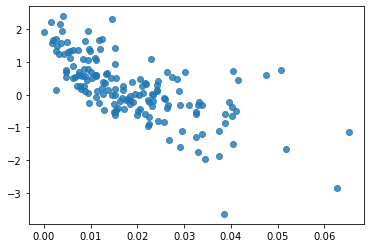

In [109]:
# errorlerimiz standart normal dağılımdan gelmelidir
# errorler nasıl dağılıyor standart bir dağılıma göre nasıl pozisyon alıyor onu görmek istiyoruz.
# aşağıdaki grafikte 0.05 ve 0.06 altında bandında seyreden aşırı hatalardır yani outlier'lar.diğer hata değerlerine yakın
# olması beklenirdi. uzak oldukları için outlier olarak tespit edilebilirler.

(cooks, p) = influence.cooks_distance
(dffits, p ) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs Studentized Residuals")
sns.regplot(leverage, model.resid_pearson, fit_reg=False)

In [110]:
# Leverage vs Studentized Residuals 
# normal olması gereken hatalar ile modelde ortaya çıkan hatalar arasındaki farklara bakıyoruz diyebiliriz.
# y ekseninde -1 -2 lere geldikçe hatalar arasındaki mesafeler artıyor. yani buradan 
# benim errorlerim alt taraflardaki gözlemleri tahmin ederken daha fazla hata yapıyor

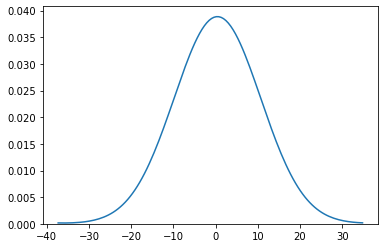

In [112]:
advres = pd.concat([ad , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(advres.resid), bw=10)

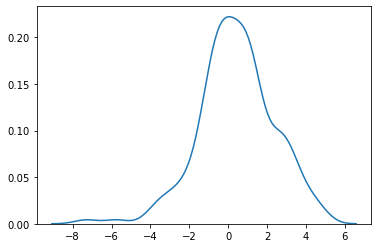

In [114]:
# eksi gözlemlerde tail var yani buradan az önce de söylediğimiz gibi alt gözlemlere inildikçe normalden yani olması gerekenden
# uzaklaşıyoruz.-4'ten sonra aşırı hatalar alıyoruz diyebiliriz.

sns.distplot(np.array(advres.resid), hist=False)

c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


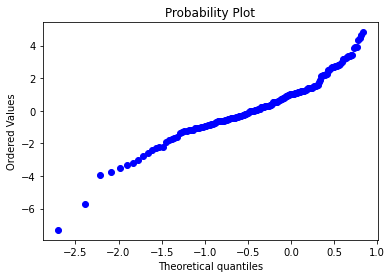

In [115]:
# probabilty plot normalden geliyor mu diye kontrol edebiliriz.

import pylab
stats.probplot(advres.resid, dist="norm", plot=pylab)
pylab.show()

In [117]:
# yani buradan olması gerektiği gibi bir model kurulmuş diyebiliriz.
# güzel ve açıklayıcı olan, errorleri normal dağılan, errorlerin sabit bir varyans arasında gidip geldiği bir model kurulmuş
# diyebiliriz.

from scipy.stats import shapiro

stat, p =shapiro(advres.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


In [ ]:
## Tests for Heteroscedasticity
# homogeneity of variance of the residuals.
# If the model is well-fitted, there should be no pattern to the residuals plotted against the fitted values.
# ıf the variance of the residuals is non-constant, then th residuals variance is said to be "heteroscedastic".

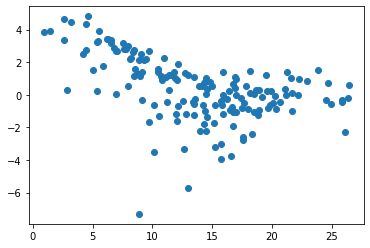

In [118]:
# prediction sonucunda errorlerin nasıl dağıldığını görebiliyoruz.

resid = model.resid
plt.scatter(model.predict(), resid)

In [120]:
# %98 olan gözlem "radio"yu çıkarınca %64.6ya düştü yani "radio" bizim için açıklayıcı bir gözlemdir diyebiliriz.

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = smf.ols("sales ~ TV + newspaper", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           3.95e-45
Time:                        17:14:08   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
#Tests for Collinearity - VIF
#a tolerance value lower than 0.1 is comparable to a VIF of 10.

# her bir gözlemin değerleri intercept, TV, newspaper burada
# değerler 10 üstünde olmaması gerekir.

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[2.486771835198193, 3.285462100162897, 3.0552445106573853]

In [123]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model.intercept_
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [129]:
#model doğrulama

X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)
lm = LinearRegression()
model = lm.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
model.score(X_train, y_train)

0.8957008271017818

In [135]:
## training ve prediction için yapılan mean squared error'ların karekökü birbirine yakın olmalıdır.
# düzgün bir prediction yaptığını buradan anlayabiliriz. prediction'da biraz düşüş çıkacaktır nedeni de hiç görmediği gözlemler
# ile karşılaşacak olmasıdır.

np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.644727765644337

In [136]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.78159966153345

In [137]:
model.score(X_train, y_train)

0.8957008271017818

In [130]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.7913548596916339

In [131]:
np.sqrt(-cross_val_score(model,  X_train, y_train,cv = 10, scoring = "neg_mean_squared_error")).mean()

1.6513523730313335

In [132]:
np.sqrt(-cross_val_score(model, X_test,  y_test, cv = 10,  scoring = "neg_mean_squared_error")).mean()

1.846277882399709